In [1]:
import soundfile as sf
import numpy as np
from scipy.signal import lfilter
from pydub import AudioSegment
from pydub import AudioSegment
from pydub.playback import play
import pygame
import time
import matplotlib.pyplot as plt
import pandas as pd

def obtener_duracion_audio(ruta_archivo):
    audio = AudioSegment.from_file(ruta_archivo)
    duracion_ms = len(audio)
    duracion_seg = duracion_ms / 1000
    return duracion_seg

def calculate_snr(audio):
    # Calcular la relación señal a ruido (SNR)
    audio, sample_rate = sf.read(audio)
    signal_power = np.sum(audio ** 2)
    noise_power = np.sum(lfilter([1], [1, -0.99], audio) ** 2)
    snr = 10 * np.log10(signal_power / noise_power)
    return snr

def calculate_thd(audio):
    # Calcular la distorsión armónica total (THD)
    audiop, sample_rate = sf.read(audio)
    fundamental = np.max(audiop)
    harmonics = np.sqrt(np.sum(audiop ** 2)) - np.abs(fundamental)
    thd = 20 * np.log10(harmonics / fundamental)
    return thd

def promedio_potencia(audio_path):
    # Calcular el promedio de nivel de potencia (PMS)
    audio, sample_rate = sf.read(audio_path)
    # Calcular la energía promedio por muestra
    energy = np.sum(audio ** 2) / len(audio)
    pms = 10 * np.log10(energy)
    return pms

def nivel_peak(audio_path):
    audio, sr = sf.read(audio_path)
    peak = 20 * np.log10(np.max(np.abs(audio)))
    return peak
    #snr = calculate_snr(audio)
    #thd = calculate_thd(audio)
    #print("Promedio de nivel de potencia (PMS): ", pms)
    #print("Nivel de pico: ", peak)
    #print("Relación señal a ruido (SNR): ", snr)
    #print("Distorsión armónica total (THD): ", thd)

C:\ProgramData\Anaconda3\lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


pygame 2.4.0 (SDL 2.26.4, Python 3.8.16)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
# def evaluar_audio(a):
#     if calculate_snr(a)>-3: #descarta risas de fondo de MELD (ruido)
#         return False
#     if calculate_thd(a)<29: #quita sonidos
#         return False
#     if promedio_potencia(a)<-53: #mide promedio de volumen
#         return False
#     if nivel_peak(a)<-35: #mide volumen maximo
#         return False
#     if obtener_duracion_audio(a)< 0.8: #quita audios cortos
#         return False
#     # Si todos los criterios se cumplen, el audio es de buena calidad
#     return True

In [3]:
# import os
# #directorio_inicial1 = r""
# directorio_inicial1 = r"D:\sentirobots\Datasets\AFEW\Datos\Audios_AFEW"
# archivos1=[]
# duracion_a=[]
# pasa=[]
# pic=[]
# mean_pot=[]
# relacion_sr=[]
# distorcion_armonicaT=[]
# archi=[]
# for raiz, carpetas, archivos_en_carpeta in os.walk(directorio_inicial1):
#     # Iteramos por cada archivo en la carpeta actual y lo agregamos a la lista de archivos
#     for archivo in archivos_en_carpeta:
#         # Verificamos si el elemento actual es un archivo
#         archi.append(archivo)
#         if os.path.isfile(os.path.join(raiz, archivo)):
#             ruta_completa1 = os.path.join(raiz, archivo)
#             archivos1.append(ruta_completa1)
#             duracion = obtener_duracion_audio(ruta_completa1)
#             prom_pot = promedio_potencia(ruta_completa1)
#             peak = nivel_peak(ruta_completa1)
#             rsr= calculate_snr(ruta_completa1)
#             dat=calculate_thd(ruta_completa1)
#             mean_pot.append(prom_pot)
#             pic.append(peak)
#             relacion_sr.append(rsr)
#             distorcion_armonicaT.append(dat)
#             duracion_a.append(duracion)
#             #print("Duración del audio:", duracion, "segundos")
#             if(evaluar_audio(ruta_completa1)):
#                pasa.append(1)
#             else:
#                pasa.append(0)


In [3]:
# import pandas as pd
# #Real
# archiv={"RutaArchivo": archivos1}
# df= pd.DataFrame(archiv)
# df["Nombre archivo"] = archi
# df["duracion"] = duracion_a
# df["Promedio level pot"] = mean_pot
# df["Nivel peak"] = pic
# df["Distorsión armónica total"] = distorcion_armonicaT
# df["Relación señal a ruido"] = relacion_sr
# df["Filtro"] = pasa
# df

### En esta iteración use el archivo CSV una vez pasado por el filtro semántico

In [5]:
rutaa= r'D:\sentirobots\Calidad de audio y texto transcrito\TCREO\Calidad-Audio-Transcripcion-TCREO-AFEW.csv'
df = pd.read_csv(rutaa)
df

,RutaArchivo,Nombre archivo,duracion,Promedio level pot,Nivel peak,Distorsión armónica total,Relación señal a ruido,Filtro,Falla en,Filtro2,Transcripcion,Tipo,Transcripcion2,Texto_without_stopwords,Tokens,TCREO,Filtro_Texto
0,D:\sentirobots\Datasets\AFEW\Datos\Audios_AFEW...,000029301.wav,2.448,-26.925982,-13.179254,36.456134,-3.733383,1,0,1,IMMY,train,immy,immy,['immy'],0.000000,0
1,D:\sentirobots\Datasets\AFEW\Datos\Audios_AFEW...,000046280.wav,3.888,-32.735003,-18.008946,38.684294,-3.522599,1,0,1,BUT I SAY THIS TO OUR CITIZENS,train,but i say this to our citizens,say citizens,"['say', 'citizens']",0.084127,1
2,D:\sentirobots\Datasets\AFEW\Datos\Audios_AFEW...,000059880.wav,1.920,-35.309039,-21.557158,35.378896,-3.944569,1,0,1,IT IS YOU KNOW WHAT IT IS,train,it is you know what it is,know,['know'],-0.011838,0
3,D:\sentirobots\Datasets\AFEW\Datos\Audios_AFEW...,000102534.wav,2.496,-33.410550,-19.041751,36.274271,-3.878937,1,0,1,ENSLAVEMENT OF A MAN MAY,train,enslavement of a man may,enslavement man may,"['enslavement', 'man', 'may']",0.230608,1
4,D:\sentirobots\Datasets\AFEW\Datos\Audios_AFEW...,000141494.wav,3.048,-32.634227,-21.347245,40.629692,-3.941288,1,0,1,JUST ABOUT EVERYTHING I KNOW ABOUT WOMEN LOVE,train,just about everything i know about women love,everything know women love,"['everything', 'know', 'women', 'love']",0.187642,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,D:\sentirobots\Datasets\AFEW\Datos\Audios_AFEW...,015145521.wav,4.056,-35.648422,-20.992422,41.414802,-3.855075,1,0,1,HE'S GOOD WITH NUMBERS TOO AND HE WORKS FOR TH...,val,hes good with numbers too and he works for the...,hes good numbers works arras,"['hes', 'good', 'numbers', 'works', 'arras']",0.186266,1
1096,D:\sentirobots\Datasets\AFEW\Datos\Audios_AFEW...,015238600.wav,2.928,-47.447955,-25.659241,29.019201,-3.944673,1,0,1,I CAN'T SEE THE MAKE UP,val,i cant see the make up,cant see make,"['cant', 'see', 'make']",0.093120,1
1097,D:\sentirobots\Datasets\AFEW\Datos\Audios_AFEW...,015626280.wav,3.096,-38.485362,-22.614764,35.334409,-3.944595,1,0,1,BUT LEVIN HE THOUGHT YOU'RE TOO BROKE NO,val,but levin he thought youre too broke no,levin thought youre broke,"['levin', 'thought', 'youre', 'broke']",0.157466,1
1098,D:\sentirobots\Datasets\AFEW\Datos\Audios_AFEW...,015646720.wav,2.040,-37.083908,-22.043003,35.543562,-3.944599,1,0,1,I KNOW THAT YOU LOVE,val,i know that you love,know love,"['know', 'love']",0.133565,1


In [78]:
# Evaluar si los valores de las columnas cumplen con la condición utilizando un OR
condicion1 = df['duracion'] < 0.8
condicion2 = df['Promedio level pot'] <-53
condicion3 = df['Nivel peak'] <-35
condicion4 = df['Distorsión armónica total'] <19
condicion5 = df['Relación señal a ruido'] > -3
condicion6 = df['Distorsión armónica total'] >= 42
condicion8 = pd.isna(df['duracion'])  # Condición para NaN
condicion9 = pd.isna(df['Promedio level pot'])  # Condición para NaN
condicion10 = pd.isna(df['Nivel peak'])  # Condición para NaN
condicion11 = pd.isna(df['Distorsión armónica total'])  # Condición para NaN
# Contar cuántas columnas cumplen con las condiciones para cada fila
df['Falla en'] = pd.concat([condicion1, condicion2, condicion3, condicion4, condicion5, condicion6, condicion8, condicion9, condicion10, condicion11], axis=1).sum(axis=1)
df

,RutaArchivo,Nombre archivo,duracion,Promedio level pot,Nivel peak,Distorsión armónica total,Relación señal a ruido,Filtro,Falla en,Filtro2,Transcripcion,Tipo,Transcripcion2,Texto_without_stopwords,Tokens,TCREO,Filtro_Texto
0,D:\sentirobots\Datasets\AFEW\Datos\Audios_AFEW...,000029301.wav,2.448,-26.925982,-13.179254,36.456134,-3.733383,1,0,1,IMMY,train,immy,immy,['immy'],0.000000,0
1,D:\sentirobots\Datasets\AFEW\Datos\Audios_AFEW...,000046280.wav,3.888,-32.735003,-18.008946,38.684294,-3.522599,1,0,1,BUT I SAY THIS TO OUR CITIZENS,train,but i say this to our citizens,say citizens,"['say', 'citizens']",0.084127,1
2,D:\sentirobots\Datasets\AFEW\Datos\Audios_AFEW...,000059880.wav,1.920,-35.309039,-21.557158,35.378896,-3.944569,1,0,1,IT IS YOU KNOW WHAT IT IS,train,it is you know what it is,know,['know'],-0.011838,0
3,D:\sentirobots\Datasets\AFEW\Datos\Audios_AFEW...,000102534.wav,2.496,-33.410550,-19.041751,36.274271,-3.878937,1,0,1,ENSLAVEMENT OF A MAN MAY,train,enslavement of a man may,enslavement man may,"['enslavement', 'man', 'may']",0.230608,1
4,D:\sentirobots\Datasets\AFEW\Datos\Audios_AFEW...,000141494.wav,3.048,-32.634227,-21.347245,40.629692,-3.941288,1,0,1,JUST ABOUT EVERYTHING I KNOW ABOUT WOMEN LOVE,train,just about everything i know about women love,everything know women love,"['everything', 'know', 'women', 'love']",0.187642,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,D:\sentirobots\Datasets\AFEW\Datos\Audios_AFEW...,015145521.wav,4.056,-35.648422,-20.992422,41.414802,-3.855075,1,0,1,HE'S GOOD WITH NUMBERS TOO AND HE WORKS FOR TH...,val,hes good with numbers too and he works for the...,hes good numbers works arras,"['hes', 'good', 'numbers', 'works', 'arras']",0.186266,1
1096,D:\sentirobots\Datasets\AFEW\Datos\Audios_AFEW...,015238600.wav,2.928,-47.447955,-25.659241,29.019201,-3.944673,1,0,1,I CAN'T SEE THE MAKE UP,val,i cant see the make up,cant see make,"['cant', 'see', 'make']",0.093120,1
1097,D:\sentirobots\Datasets\AFEW\Datos\Audios_AFEW...,015626280.wav,3.096,-38.485362,-22.614764,35.334409,-3.944595,1,0,1,BUT LEVIN HE THOUGHT YOU'RE TOO BROKE NO,val,but levin he thought youre too broke no,levin thought youre broke,"['levin', 'thought', 'youre', 'broke']",0.157466,1
1098,D:\sentirobots\Datasets\AFEW\Datos\Audios_AFEW...,015646720.wav,2.040,-37.083908,-22.043003,35.543562,-3.944599,1,0,1,I KNOW THAT YOU LOVE,val,i know that you love,know love,"['know', 'love']",0.133565,1


In [117]:
def actualizar_filtro(row):
    if row['Falla en'] >= 1:
        return 0
    else:
        return 1

df['Filtro'] = df.apply(actualizar_filtro, axis=1)
df

,RutaArchivo,Nombre archivo,duracion,Promedio level pot,Nivel peak,Distorsión armónica total,Relación señal a ruido,Filtro,Falla en,Filtro2,Transcripcion,Tipo,Transcripcion2,Texto_without_stopwords,Tokens,TCREO,Filtro_Texto
0,D:\sentirobots\Datasets\AFEW\Datos\Audios_AFEW...,000029301.wav,2.448,-26.925982,-13.179254,36.456134,-3.733383,1,0,1,IMMY,train,immy,immy,['immy'],0.000000,0
1,D:\sentirobots\Datasets\AFEW\Datos\Audios_AFEW...,000046280.wav,3.888,-32.735003,-18.008946,38.684294,-3.522599,1,0,1,BUT I SAY THIS TO OUR CITIZENS,train,but i say this to our citizens,say citizens,"['say', 'citizens']",0.084127,1
2,D:\sentirobots\Datasets\AFEW\Datos\Audios_AFEW...,000059880.wav,1.920,-35.309039,-21.557158,35.378896,-3.944569,1,0,1,IT IS YOU KNOW WHAT IT IS,train,it is you know what it is,know,['know'],-0.011838,0
3,D:\sentirobots\Datasets\AFEW\Datos\Audios_AFEW...,000102534.wav,2.496,-33.410550,-19.041751,36.274271,-3.878937,1,0,1,ENSLAVEMENT OF A MAN MAY,train,enslavement of a man may,enslavement man may,"['enslavement', 'man', 'may']",0.230608,1
4,D:\sentirobots\Datasets\AFEW\Datos\Audios_AFEW...,000141494.wav,3.048,-32.634227,-21.347245,40.629692,-3.941288,1,0,1,JUST ABOUT EVERYTHING I KNOW ABOUT WOMEN LOVE,train,just about everything i know about women love,everything know women love,"['everything', 'know', 'women', 'love']",0.187642,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,D:\sentirobots\Datasets\AFEW\Datos\Audios_AFEW...,015145521.wav,4.056,-35.648422,-20.992422,41.414802,-3.855075,1,0,1,HE'S GOOD WITH NUMBERS TOO AND HE WORKS FOR TH...,val,hes good with numbers too and he works for the...,hes good numbers works arras,"['hes', 'good', 'numbers', 'works', 'arras']",0.186266,1
1096,D:\sentirobots\Datasets\AFEW\Datos\Audios_AFEW...,015238600.wav,2.928,-47.447955,-25.659241,29.019201,-3.944673,1,0,1,I CAN'T SEE THE MAKE UP,val,i cant see the make up,cant see make,"['cant', 'see', 'make']",0.093120,1
1097,D:\sentirobots\Datasets\AFEW\Datos\Audios_AFEW...,015626280.wav,3.096,-38.485362,-22.614764,35.334409,-3.944595,1,0,1,BUT LEVIN HE THOUGHT YOU'RE TOO BROKE NO,val,but levin he thought youre too broke no,levin thought youre broke,"['levin', 'thought', 'youre', 'broke']",0.157466,1
1098,D:\sentirobots\Datasets\AFEW\Datos\Audios_AFEW...,015646720.wav,2.040,-37.083908,-22.043003,35.543562,-3.944599,1,0,1,I KNOW THAT YOU LOVE,val,i know that you love,know love,"['know', 'love']",0.133565,1


In [118]:
conteo = df['Filtro'].value_counts()
print(conteo)

1    1069
0      31
Name: Filtro, dtype: int64


In [119]:
df_fallas = df[df['Filtro'] == 0].copy()
df_buenas = df[df['Filtro'] == 1].copy()

In [120]:
df.describe()

,duracion,Promedio level pot,Nivel peak,Distorsión armónica total,Relación señal a ruido,Filtro,Falla en,Filtro2,TCREO,Filtro_Texto
count,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.0,1096.000000,1100.000000
mean,2.485680,-37.721084,-22.911291,35.615331,-3.850305,0.971818,0.028182,1.0,0.143158,0.963636
std,1.018076,5.040736,4.374026,3.044942,0.176247,0.165567,0.165567,0.0,0.054984,0.187278
min,0.408000,-53.806015,-38.159898,24.005381,-4.064787,0.000000,0.000000,1.0,-0.123927,0.000000
25%,1.680000,-40.963205,-25.403686,33.766687,-3.943259,1.000000,0.000000,1.0,0.111438,1.000000
50%,2.280000,-37.463662,-22.465616,35.844645,-3.931935,1.000000,0.000000,1.0,0.138747,1.000000
75%,3.120000,-34.348698,-20.126293,37.743669,-3.848142,1.000000,0.000000,1.0,0.171782,1.000000
max,6.216000,-20.837989,-8.837564,43.753973,-3.011048,1.000000,1.000000,1.0,0.381612,1.000000


In [121]:
duracion_df = df_fallas[df_fallas['duracion'] < 0.8].copy()
conteos = duracion_df['Filtro'].value_counts()
print(conteos)
duracion_df

0    14
Name: Filtro, dtype: int64


,RutaArchivo,Nombre archivo,duracion,Promedio level pot,Nivel peak,Distorsión armónica total,Relación señal a ruido,Filtro,Falla en,Filtro2,Transcripcion,Tipo,Transcripcion2,Texto_without_stopwords,Tokens,TCREO,Filtro_Texto
78,D:\sentirobots\Datasets\AFEW\Datos\Audios_AFEW...,001113440.wav,0.768,-28.277904,-15.595424,32.409875,-3.426222,0,1,1,THE RENNET,train,the rennet,rennet,['rennet'],0.150702,0
129,D:\sentirobots\Datasets\AFEW\Datos\Audios_AFEW...,001821420.wav,0.528,-31.030312,-20.400887,32.845620,-4.011207,0,1,1,ALBANY,train,albany,albany,['albany'],0.234773,0
179,D:\sentirobots\Datasets\AFEW\Datos\Audios_AFEW...,002516934.wav,0.744,-34.882149,-23.040520,34.093665,-3.887955,0,1,1,HYM,train,hym,hym,['hym'],0.224047,0
255,D:\sentirobots\Datasets\AFEW\Datos\Audios_AFEW...,003316894.wav,0.696,-30.668156,-20.473363,34.513765,-3.300974,0,1,1,AIN'T ONE,train,aint one,aint one,"['aint', 'one']",0.214625,0
400,D:\sentirobots\Datasets\AFEW\Datos\Audios_AFEW...,004924334.wav,0.768,-29.888349,-19.904570,35.885761,-3.897001,0,1,1,PORTFOLIO,train,portfolio,portfolio,['portfolio'],0.209252,0
582,D:\sentirobots\Datasets\AFEW\Datos\Audios_AFEW...,011603980.wav,0.408,-33.261932,-22.465616,32.241188,-3.818926,0,1,1,WHAT,train,what,NaN,[],0.163810,0
665,D:\sentirobots\Datasets\AFEW\Datos\Audios_AFEW...,012943150.wav,0.624,-32.535602,-19.535011,31.993382,-3.478240,0,1,1,HM HM,train,hm hm,hm hm,"['hm', 'hm']",0.133229,0
711,D:\sentirobots\Datasets\AFEW\Datos\Audios_AFEW...,014643120.wav,0.768,-48.662410,-32.865873,29.217677,-3.896165,0,1,1,ERMINE,train,ermine,ermine,['ermine'],0.170784,0
738,D:\sentirobots\Datasets\AFEW\Datos\Audios_AFEW...,000322047.wav,0.696,-24.535419,-12.569038,33.663542,-3.723561,0,1,1,BOEHMER,val,boehmer,boehmer,['boehmer'],0.258906,0
743,D:\sentirobots\Datasets\AFEW\Datos\Audios_AFEW...,000403327.wav,0.624,-38.134963,-24.284057,30.283557,-3.942433,0,1,1,WHAT'S LOVELY,val,whats lovely,whats lovely,"['whats', 'lovely']",0.191295,0


In [122]:
duracion_df.describe()

,duracion,Promedio level pot,Nivel peak,Distorsión armónica total,Relación señal a ruido,Filtro,Falla en,Filtro2,TCREO,Filtro_Texto
count,14.000000,14.000000,14.000000,14.000000,14.000000,14.0,14.0,14.0,14.000000,14.0
mean,0.682286,-33.207529,-21.071990,32.695434,-3.745715,0.0,1.0,1.0,0.192304,0.0
std,0.106384,5.631798,4.539199,2.026900,0.218050,0.0,0.0,0.0,0.063280,0.0
min,0.408000,-48.662410,-32.865873,29.217677,-4.011207,0.0,1.0,1.0,0.111438,0.0
25%,0.642000,-34.692870,-22.843408,31.810539,-3.895223,0.0,1.0,1.0,0.153979,0.0
50%,0.696000,-32.898767,-20.507084,32.627748,-3.820469,0.0,1.0,1.0,0.181040,0.0
75%,0.768000,-30.083301,-19.806989,33.986135,-3.596496,0.0,1.0,1.0,0.221692,0.0
max,0.768000,-24.535419,-12.569038,35.885761,-3.300974,0.0,1.0,1.0,0.347179,0.0


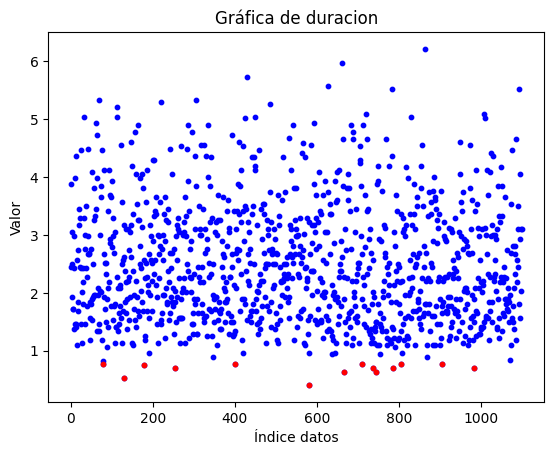

In [123]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

column_data = df['duracion']
plt.scatter(range(len(column_data)), column_data, s=10, color='blue')
plt.xlabel('Índice datos')
plt.ylabel('Valor')
plt.title('Gráfica de duracion')
mask = column_data < 0.8
plt.scatter(np.where(mask)[0], column_data[mask], s=10, color='red')
plt.show()

In [124]:
# from pydub import AudioSegment
# from pydub.playback import play
# import pygame
# import time

# lista = duracion_df['RutaArchivo'].tolist()

# pygame.init()
# pygame.mixer.init()

# for audio_path in lista:
#     # Cargar el archivo de audio
#     audio = AudioSegment.from_file(audio_path)

#     # Reproducir el audio
#     pygame.mixer.music.load(audio_path)
#     pygame.mixer.music.play()

#     # Mostrar el nombre del archivo que se está reproduciendo
#     print("Reproduciendo:", audio_path)

#     # Pausar la reproducción durante 5 segundos
#     time.sleep(5)
#     pygame.mixer.music.pause()

#     # Esperar 2 segundos
#     time.sleep(2)

#     # Reanudar la reproducción
#     pygame.mixer.music.unpause()

#     # Esperar 5 segundos antes de reproducir el siguiente archivo
#     time.sleep(5)

# # Detener la reproducción al finalizar
# pygame.mixer.music.stop()
# pygame.quit()

In [125]:
pot_df = df_fallas[df_fallas['Promedio level pot'] <-53].copy()
conteosp = pot_df['Filtro'].value_counts()
print(conteosp)
pot_df

0    1
Name: Filtro, dtype: int64


,RutaArchivo,Nombre archivo,duracion,Promedio level pot,Nivel peak,Distorsión armónica total,Relación señal a ruido,Filtro,Falla en,Filtro2,Transcripcion,Tipo,Transcripcion2,Texto_without_stopwords,Tokens,TCREO,Filtro_Texto
243,D:\sentirobots\Datasets\AFEW\Datos\Audios_AFEW...,003210880.wav,4.488,-53.806015,-34.104348,35.501692,-3.934158,0,1,1,I'M SORRY I CAN'T COME HERE JUST FORGET THIS H...,train,im sorry i cant come here just forget this hap...,im sorry cant come forget happened,"['im', 'sorry', 'cant', 'come', 'forget', 'hap...",0.137413,1


In [126]:
pot_df.describe()

,duracion,Promedio level pot,Nivel peak,Distorsión armónica total,Relación señal a ruido,Filtro,Falla en,Filtro2,TCREO,Filtro_Texto
count,1.000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.000000,1.0
mean,4.488,-53.806015,-34.104348,35.501692,-3.934158,0.0,1.0,1.0,0.137413,1.0
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,4.488,-53.806015,-34.104348,35.501692,-3.934158,0.0,1.0,1.0,0.137413,1.0
25%,4.488,-53.806015,-34.104348,35.501692,-3.934158,0.0,1.0,1.0,0.137413,1.0
50%,4.488,-53.806015,-34.104348,35.501692,-3.934158,0.0,1.0,1.0,0.137413,1.0
75%,4.488,-53.806015,-34.104348,35.501692,-3.934158,0.0,1.0,1.0,0.137413,1.0
max,4.488,-53.806015,-34.104348,35.501692,-3.934158,0.0,1.0,1.0,0.137413,1.0


In [127]:
# lista = pot_df['RutaArchivo'].tolist()

# pygame.init()
# pygame.mixer.init()

# for audio_path in lista:
#     # Cargar el archivo de audio
#     audio = AudioSegment.from_file(audio_path)

#     # Reproducir el audio
#     pygame.mixer.music.load(audio_path)
#     pygame.mixer.music.play()

#     # Mostrar el nombre del archivo que se está reproduciendo
#     print("Reproduciendo:", audio_path)

#     # Pausar la reproducción durante 5 segundos
#  #   time.sleep(5)
#   #  pygame.mixer.music.pause()

#     # Esperar 2 segundos
#     time.sleep(2)

#     # Reanudar la reproducción
#     pygame.mixer.music.unpause()

#     # Esperar 5 segundos antes de reproducir el siguiente archivo
#     time.sleep(1)

# # Detener la reproducción al finalizar
# pygame.mixer.music.stop()
# pygame.quit()

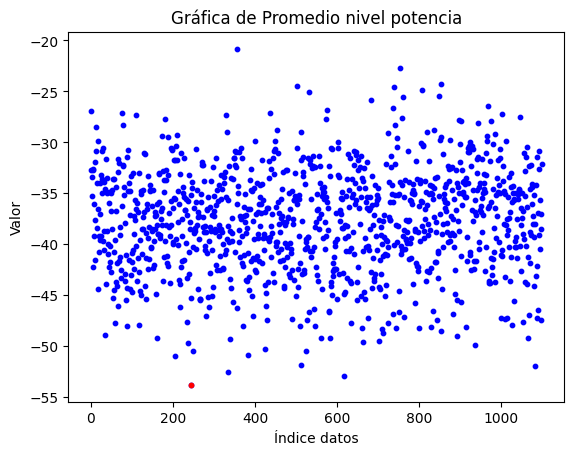

In [128]:
column_data = df['Promedio level pot']
plt.scatter(range(len(column_data)), column_data, s=10, color='blue')
plt.xlabel('Índice datos')
plt.ylabel('Valor')
plt.title('Gráfica de Promedio nivel potencia')
mask = column_data <-53
plt.scatter(np.where(mask)[0], column_data[mask], s=10, color='red')
plt.show()

In [129]:
peak_df = df_fallas[df_fallas['Nivel peak'] <-35].copy()
conteospp = peak_df['Filtro'].value_counts()
print(conteospp)
peak_df

0    7
Name: Filtro, dtype: int64


,RutaArchivo,Nombre archivo,duracion,Promedio level pot,Nivel peak,Distorsión armónica total,Relación señal a ruido,Filtro,Falla en,Filtro2,Transcripcion,Tipo,Transcripcion2,Texto_without_stopwords,Tokens,TCREO,Filtro_Texto
34,D:\sentirobots\Datasets\AFEW\Datos\Audios_AFEW...,000456960.wav,3.000,-48.896972,-35.070442,37.692030,-3.460862,0,1,1,EVEN THE REASON WHY I CAN LOSE,train,even the reason why i can lose,even reason lose,"['even', 'reason', 'lose']",0.189900,1
237,D:\sentirobots\Datasets\AFEW\Datos\Audios_AFEW...,003140160.wav,3.216,-49.695643,-35.345238,37.236692,-3.938195,0,1,1,HAD THE NUMBER FOR A TAXI ENTERED AGAINST THE ...,train,had the number for a taxi entered against the ...,number taxi entered jennie,"['number', 'taxi', 'entered', 'jennie']",0.141304,1
511,D:\sentirobots\Datasets\AFEW\Datos\Audios_AFEW...,010516320.wav,1.776,-51.849043,-37.599324,34.527481,-3.307572,0,1,1,OH I REALLY HOPE SO,train,oh i really hope so,oh really hope,"['oh', 'really', 'hope']",0.133194,1
579,D:\sentirobots\Datasets\AFEW\Datos\Audios_AFEW...,011549760.wav,1.296,-46.592051,-36.540602,38.680565,-3.896866,0,1,1,HM HY,train,hm hy,hm hy,"['hm', 'hy']",0.000000,0
583,D:\sentirobots\Datasets\AFEW\Datos\Audios_AFEW...,011613697.wav,1.608,-49.236670,-38.159898,38.084488,-3.453919,0,1,1,ERMINE AYE,train,ermine aye,ermine aye,"['ermine', 'aye']",0.156178,1
617,D:\sentirobots\Datasets\AFEW\Datos\Audios_AFEW...,012028960.wav,1.920,-52.935224,-35.629013,31.749477,-3.971741,0,1,1,ERMINE DO YOU LOVE,train,ermine do you love,ermine love,"['ermine', 'love']",0.140815,1
915,D:\sentirobots\Datasets\AFEW\Datos\Audios_AFEW...,004606320.wav,1.680,-48.136034,-35.085482,36.185906,-3.561600,0,1,1,LOUNGE IT IN THE ROOM,val,lounge it in the room,lounge room,"['lounge', 'room']",0.189199,1


In [130]:
peak_df.describe()

,duracion,Promedio level pot,Nivel peak,Distorsión armónica total,Relación señal a ruido,Filtro,Falla en,Filtro2,TCREO,Filtro_Texto
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.0,7.0,7.0,7.000000,7.000000
mean,2.070857,-49.620234,-36.204286,36.308091,-3.655822,0.0,1.0,1.0,0.135799,0.857143
std,0.736180,2.160455,1.257636,2.433388,0.272816,0.0,0.0,0.0,0.064158,0.377964
min,1.296000,-52.935224,-38.159898,31.749477,-3.971741,0.0,1.0,1.0,0.000000,0.000000
25%,1.644000,-50.772343,-37.069963,35.356694,-3.917531,0.0,1.0,1.0,0.137004,1.000000
50%,1.776000,-49.236670,-35.629013,37.236692,-3.561600,0.0,1.0,1.0,0.141304,1.000000
75%,2.460000,-48.516503,-35.215360,37.888259,-3.457390,0.0,1.0,1.0,0.172689,1.000000
max,3.216000,-46.592051,-35.070442,38.680565,-3.307572,0.0,1.0,1.0,0.189900,1.000000


In [131]:
# lista = peak_df['RutaArchivo'].tolist()

# pygame.init()
# pygame.mixer.init()

# for audio_path in lista:
#     # Cargar el archivo de audio
#     audio = AudioSegment.from_file(audio_path)

#     # Reproducir el audio
#     pygame.mixer.music.load(audio_path)
#     pygame.mixer.music.play()

#     # Mostrar el nombre del archivo que se está reproduciendo
#     print("Reproduciendo:", audio_path)

#     # Pausar la reproducción durante 5 segundos
#  #   time.sleep(5)
#   #  pygame.mixer.music.pause()

#     # Esperar 2 segundos
#     time.sleep(2)

#     # Reanudar la reproducción
#     pygame.mixer.music.unpause()

#     # Esperar 5 segundos antes de reproducir el siguiente archivo
#     time.sleep(1)

# # Detener la reproducción al finalizar
# pygame.mixer.music.stop()
# pygame.quit()

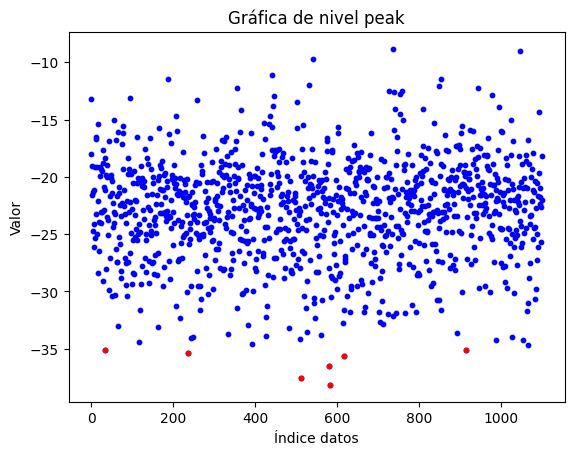

In [132]:
# Obtener los datos de una columna específica
column_data = df['Nivel peak']

# Crear la gráfica de puntos
plt.scatter(range(len(column_data)), column_data, s=10, color='blue')

# Configurar etiquetas y título del gráfico
plt.xlabel('Índice datos')
plt.ylabel('Valor')
plt.title('Gráfica de nivel peak')

# Identificar los puntos con valor menor a 1 y trazarlos en rojo
mask = column_data <-35
plt.scatter(np.where(mask)[0], column_data[mask], s=10, color='red')

# Mostrar la gráfica
plt.show()

In [133]:
dis_df = df[(df['Distorsión armónica total'] <=19) | (df['Distorsión armónica total'] >= 42)].copy()
conteosppd = dis_df['Filtro'].value_counts()
print(conteosppd)
dis_df

0    9
Name: Filtro, dtype: int64


,RutaArchivo,Nombre archivo,duracion,Promedio level pot,Nivel peak,Distorsión armónica total,Relación señal a ruido,Filtro,Falla en,Filtro2,Transcripcion,Tipo,Transcripcion2,Texto_without_stopwords,Tokens,TCREO,Filtro_Texto
13,D:\sentirobots\Datasets\AFEW\Datos\Audios_AFEW...,000252168.wav,4.368,-28.507301,-16.714991,42.168378,-3.245836,0,1,1,AS THEY LOOKED AT IT THEY HEARD BENEATH THE PLAY,train,as they looked at it they heard beneath the play,looked heard beneath play,"['looked', 'heard', 'beneath', 'play']",0.128979,1
76,D:\sentirobots\Datasets\AFEW\Datos\Audios_AFEW...,001035680.wav,4.464,-27.157296,-17.097380,43.753973,-3.817600,0,1,1,A SHEET OF CANYON'S FERVOUR TO NE'ER A STONE,train,a sheet of canyons fervour to neer a stone,sheet canyons fervour neer stone,"['sheet', 'canyons', 'fervour', 'neer', 'stone']",0.211710,1
160,D:\sentirobots\Datasets\AFEW\Datos\Audios_AFEW...,002251800.wav,4.056,-38.078235,-28.603187,43.469000,-3.615184,0,1,1,HE SAID CHILDHOOD'S OVER THE MOMENT YOU KNOW Y...,train,he said childhoods over the moment you know yo...,said childhoods moment know youre going die,"['said', 'childhoods', 'moment', 'know', 'your...",0.126704,1
190,D:\sentirobots\Datasets\AFEW\Datos\Audios_AFEW...,002616120.wav,2.664,-38.348608,-27.343117,42.639820,-3.944581,0,1,1,THIS IS WHAT I IMAGINE LOVE TO BE,train,this is what i imagine love to be,imagine love,"['imagine', 'love']",0.103301,1
330,D:\sentirobots\Datasets\AFEW\Datos\Audios_AFEW...,004159320.wav,4.368,-27.274308,-16.506850,42.760468,-3.749928,0,1,1,IT IS WELL AND LOVES ITS MOTHER,train,it is well and loves its mother,well loves mother,"['well', 'loves', 'mother']",0.104941,1
669,D:\sentirobots\Datasets\AFEW\Datos\Audios_AFEW...,013042560.wav,3.096,-34.494234,-26.319380,43.133657,-3.939927,0,1,1,PRIZE OTHER THAN THE HOLD OUT YOU DON'T WANT T...,train,prize other than the hold out you dont want to...,prize hold dont want sell done,"['prize', 'hold', 'dont', 'want', 'sell', 'done']",0.132198,1
683,D:\sentirobots\Datasets\AFEW\Datos\Audios_AFEW...,013645920.wav,4.896,-25.879305,-16.207126,43.613500,-3.011048,0,1,1,AND THESE SELF ARE THE GIRL WHO PREFERS NO FRIEND,train,and these self are the girl who prefers no friend,self girl prefers friend,"['self', 'girl', 'prefers', 'friend']",0.117635,1
729,D:\sentirobots\Datasets\AFEW\Datos\Audios_AFEW...,023340360.wav,3.096,-35.812890,-26.017420,42.312631,-3.984741,0,1,1,AND LA LA LA LA LA LA LA,train,and la la la la la la la,la la la la la la la,"['la', 'la', 'la', 'la', 'la', 'la', 'la']",0.117213,1
986,D:\sentirobots\Datasets\AFEW\Datos\Audios_AFEW...,010507927.wav,3.408,-43.750591,-34.226210,42.701360,-3.541222,0,1,1,IMMERSE IMMERSE,val,immerse immerse,immerse immerse,"['immerse', 'immerse']",0.082915,1


In [134]:
dis_df.describe()

,duracion,Promedio level pot,Nivel peak,Distorsión armónica total,Relación señal a ruido,Filtro,Falla en,Filtro2,TCREO,Filtro_Texto
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.0,9.0,9.0,9.000000,9.0
mean,3.824000,-33.255863,-23.226185,42.950310,-3.650007,0.0,1.0,1.0,0.125066,1.0
std,0.773232,6.298180,6.695103,0.570178,0.336455,0.0,0.0,0.0,0.035966,0.0
min,2.664000,-43.750591,-34.226210,42.168378,-3.984741,0.0,1.0,1.0,0.082915,1.0
25%,3.096000,-38.078235,-27.343117,42.639820,-3.939927,0.0,1.0,1.0,0.104941,1.0
50%,4.056000,-34.494234,-26.017420,42.760468,-3.749928,0.0,1.0,1.0,0.117635,1.0
75%,4.368000,-27.274308,-16.714991,43.469000,-3.541222,0.0,1.0,1.0,0.128979,1.0
max,4.896000,-25.879305,-16.207126,43.753973,-3.011048,0.0,1.0,1.0,0.211710,1.0


In [135]:
# lista = dis_df['RutaArchivo'].tolist()

# pygame.init()
# pygame.mixer.init()

# for audio_path in lista:
#     # Cargar el archivo de audio
#     audio = AudioSegment.from_file(audio_path)

#     # Reproducir el audio
#     pygame.mixer.music.load(audio_path)
#     pygame.mixer.music.play()

#     # Mostrar el nombre del archivo que se está reproduciendo
#     print("Reproduciendo:", audio_path)

#     # Pausar la reproducción durante 5 segundos
#  #   time.sleep(5)
#   #  pygame.mixer.music.pause()

#     # Esperar 2 segundos
#     time.sleep(2)

#     # Reanudar la reproducción
#     pygame.mixer.music.unpause()

#     # Esperar 5 segundos antes de reproducir el siguiente archivo
#     time.sleep(1)

# # Detener la reproducción al finalizar
# pygame.mixer.music.stop()
# pygame.quit()

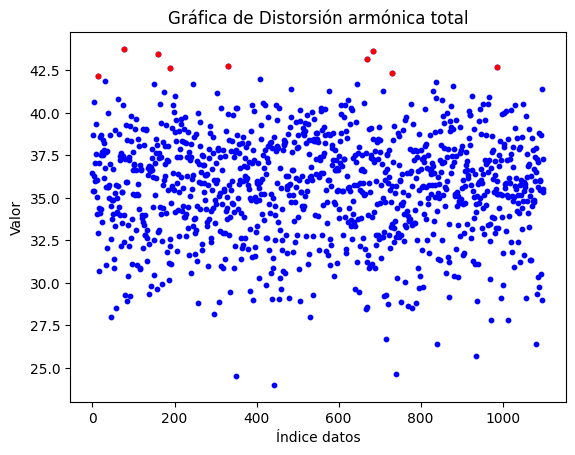

In [136]:
column_data = df['Distorsión armónica total']
plt.scatter(range(len(column_data)), column_data, s=10, color='blue')
plt.xlabel('Índice datos')
plt.ylabel('Valor')
plt.title('Gráfica de Distorsión armónica total')
mask = column_data <=19
plt.scatter(np.where(mask)[0], column_data[mask], s=10, color='red')
mask = column_data >= 42
plt.scatter(np.where(mask)[0], column_data[mask], s=10, color='red')
plt.show()

In [137]:
rsr_df = df[(df['Relación señal a ruido'] > -3) | (df['Relación señal a ruido'] < -36)].copy()
conteosppde = rsr_df['Filtro'].value_counts()
print(conteosppde)
rsr_df

Series([], Name: Filtro, dtype: int64)


,RutaArchivo,Nombre archivo,duracion,Promedio level pot,Nivel peak,Distorsión armónica total,Relación señal a ruido,Filtro,Falla en,Filtro2,Transcripcion,Tipo,Transcripcion2,Texto_without_stopwords,Tokens,TCREO,Filtro_Texto


In [138]:
rsr_df.describe()

,duracion,Promedio level pot,Nivel peak,Distorsión armónica total,Relación señal a ruido,Filtro,Falla en,Filtro2,TCREO,Filtro_Texto
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [139]:
# lista = rsr_df['RutaArchivo'].tolist()

# pygame.init()
# pygame.mixer.init()

# for audio_path in lista:
#     # Cargar el archivo de audio
#     audio = AudioSegment.from_file(audio_path)

#     # Reproducir el audio
#     pygame.mixer.music.load(audio_path)
#     pygame.mixer.music.play()

#     # Mostrar el nombre del archivo que se está reproduciendo
#     print("Reproduciendo:", audio_path)

#     # Pausar la reproducción durante 5 segundos
#  #   time.sleep(5)
#   #  pygame.mixer.music.pause()

#     # Esperar 2 segundos
#     time.sleep(2)

#     # Reanudar la reproducción
#     pygame.mixer.music.unpause()

#     # Esperar 5 segundos antes de reproducir el siguiente archivo
#     time.sleep(1)

# # Detener la reproducción al finalizar
# pygame.mixer.music.stop()

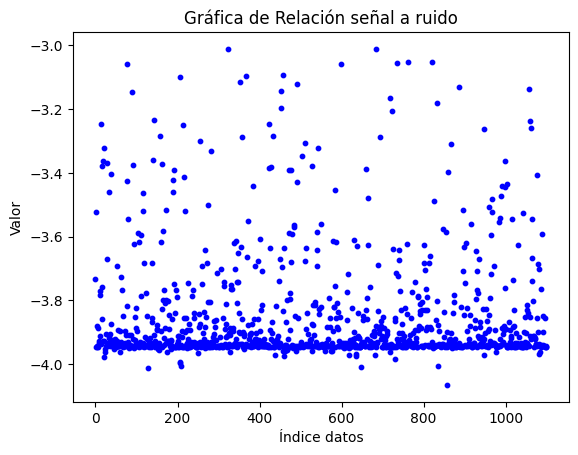

In [140]:
column_data = df['Relación señal a ruido']
plt.scatter(range(len(column_data)), column_data, s=10, color='blue')
plt.xlabel('Índice datos')
plt.ylabel('Valor')
plt.title('Gráfica de Relación señal a ruido')
mask = column_data > -3
plt.scatter(np.where(mask)[0], column_data[mask], s=10, color='red')
plt.show()

In [141]:
# lista = df_fallas['RutaArchivo'].tolist()

# pygame.init()
# pygame.mixer.init()

# for audio_path in lista:
#     # Cargar el archivo de audio
#     audio = AudioSegment.from_file(audio_path)

#     # Reproducir el audio
#     pygame.mixer.music.load(audio_path)
#     pygame.mixer.music.play()

#     # Mostrar el nombre del archivo que se está reproduciendo
#     print("Reproduciendo:", audio_path)

#     # Pausar la reproducción durante 5 segundos
#     #time.sleep(5)
#     #pygame.mixer.music.pause()

#     # Esperar 2 segundos
#     time.sleep(2)

#     # Reanudar la reproducción
#     pygame.mixer.music.unpause()

#     # Esperar 5 segundos antes de reproducir el siguiente archivo
#     time.sleep(1)

# # Detener la reproducción al finalizar
# pygame.mixer.music.stop()
# pygame.quit()

In [142]:
df_fallas

,RutaArchivo,Nombre archivo,duracion,Promedio level pot,Nivel peak,Distorsión armónica total,Relación señal a ruido,Filtro,Falla en,Filtro2,Transcripcion,Tipo,Transcripcion2,Texto_without_stopwords,Tokens,TCREO,Filtro_Texto
13,D:\sentirobots\Datasets\AFEW\Datos\Audios_AFEW...,000252168.wav,4.368,-28.507301,-16.714991,42.168378,-3.245836,0,1,1,AS THEY LOOKED AT IT THEY HEARD BENEATH THE PLAY,train,as they looked at it they heard beneath the play,looked heard beneath play,"['looked', 'heard', 'beneath', 'play']",0.128979,1
34,D:\sentirobots\Datasets\AFEW\Datos\Audios_AFEW...,000456960.wav,3.000,-48.896972,-35.070442,37.692030,-3.460862,0,1,1,EVEN THE REASON WHY I CAN LOSE,train,even the reason why i can lose,even reason lose,"['even', 'reason', 'lose']",0.189900,1
76,D:\sentirobots\Datasets\AFEW\Datos\Audios_AFEW...,001035680.wav,4.464,-27.157296,-17.097380,43.753973,-3.817600,0,1,1,A SHEET OF CANYON'S FERVOUR TO NE'ER A STONE,train,a sheet of canyons fervour to neer a stone,sheet canyons fervour neer stone,"['sheet', 'canyons', 'fervour', 'neer', 'stone']",0.211710,1
78,D:\sentirobots\Datasets\AFEW\Datos\Audios_AFEW...,001113440.wav,0.768,-28.277904,-15.595424,32.409875,-3.426222,0,1,1,THE RENNET,train,the rennet,rennet,['rennet'],0.150702,0
129,D:\sentirobots\Datasets\AFEW\Datos\Audios_AFEW...,001821420.wav,0.528,-31.030312,-20.400887,32.845620,-4.011207,0,1,1,ALBANY,train,albany,albany,['albany'],0.234773,0
160,D:\sentirobots\Datasets\AFEW\Datos\Audios_AFEW...,002251800.wav,4.056,-38.078235,-28.603187,43.469000,-3.615184,0,1,1,HE SAID CHILDHOOD'S OVER THE MOMENT YOU KNOW Y...,train,he said childhoods over the moment you know yo...,said childhoods moment know youre going die,"['said', 'childhoods', 'moment', 'know', 'your...",0.126704,1
179,D:\sentirobots\Datasets\AFEW\Datos\Audios_AFEW...,002516934.wav,0.744,-34.882149,-23.040520,34.093665,-3.887955,0,1,1,HYM,train,hym,hym,['hym'],0.224047,0
190,D:\sentirobots\Datasets\AFEW\Datos\Audios_AFEW...,002616120.wav,2.664,-38.348608,-27.343117,42.639820,-3.944581,0,1,1,THIS IS WHAT I IMAGINE LOVE TO BE,train,this is what i imagine love to be,imagine love,"['imagine', 'love']",0.103301,1
237,D:\sentirobots\Datasets\AFEW\Datos\Audios_AFEW...,003140160.wav,3.216,-49.695643,-35.345238,37.236692,-3.938195,0,1,1,HAD THE NUMBER FOR A TAXI ENTERED AGAINST THE ...,train,had the number for a taxi entered against the ...,number taxi entered jennie,"['number', 'taxi', 'entered', 'jennie']",0.141304,1
243,D:\sentirobots\Datasets\AFEW\Datos\Audios_AFEW...,003210880.wav,4.488,-53.806015,-34.104348,35.501692,-3.934158,0,1,1,I'M SORRY I CAN'T COME HERE JUST FORGET THIS H...,train,im sorry i cant come here just forget this hap...,im sorry cant come forget happened,"['im', 'sorry', 'cant', 'come', 'forget', 'hap...",0.137413,1


In [143]:
df_buenas

,RutaArchivo,Nombre archivo,duracion,Promedio level pot,Nivel peak,Distorsión armónica total,Relación señal a ruido,Filtro,Falla en,Filtro2,Transcripcion,Tipo,Transcripcion2,Texto_without_stopwords,Tokens,TCREO,Filtro_Texto
0,D:\sentirobots\Datasets\AFEW\Datos\Audios_AFEW...,000029301.wav,2.448,-26.925982,-13.179254,36.456134,-3.733383,1,0,1,IMMY,train,immy,immy,['immy'],0.000000,0
1,D:\sentirobots\Datasets\AFEW\Datos\Audios_AFEW...,000046280.wav,3.888,-32.735003,-18.008946,38.684294,-3.522599,1,0,1,BUT I SAY THIS TO OUR CITIZENS,train,but i say this to our citizens,say citizens,"['say', 'citizens']",0.084127,1
2,D:\sentirobots\Datasets\AFEW\Datos\Audios_AFEW...,000059880.wav,1.920,-35.309039,-21.557158,35.378896,-3.944569,1,0,1,IT IS YOU KNOW WHAT IT IS,train,it is you know what it is,know,['know'],-0.011838,0
3,D:\sentirobots\Datasets\AFEW\Datos\Audios_AFEW...,000102534.wav,2.496,-33.410550,-19.041751,36.274271,-3.878937,1,0,1,ENSLAVEMENT OF A MAN MAY,train,enslavement of a man may,enslavement man may,"['enslavement', 'man', 'may']",0.230608,1
4,D:\sentirobots\Datasets\AFEW\Datos\Audios_AFEW...,000141494.wav,3.048,-32.634227,-21.347245,40.629692,-3.941288,1,0,1,JUST ABOUT EVERYTHING I KNOW ABOUT WOMEN LOVE,train,just about everything i know about women love,everything know women love,"['everything', 'know', 'women', 'love']",0.187642,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,D:\sentirobots\Datasets\AFEW\Datos\Audios_AFEW...,015145521.wav,4.056,-35.648422,-20.992422,41.414802,-3.855075,1,0,1,HE'S GOOD WITH NUMBERS TOO AND HE WORKS FOR TH...,val,hes good with numbers too and he works for the...,hes good numbers works arras,"['hes', 'good', 'numbers', 'works', 'arras']",0.186266,1
1096,D:\sentirobots\Datasets\AFEW\Datos\Audios_AFEW...,015238600.wav,2.928,-47.447955,-25.659241,29.019201,-3.944673,1,0,1,I CAN'T SEE THE MAKE UP,val,i cant see the make up,cant see make,"['cant', 'see', 'make']",0.093120,1
1097,D:\sentirobots\Datasets\AFEW\Datos\Audios_AFEW...,015626280.wav,3.096,-38.485362,-22.614764,35.334409,-3.944595,1,0,1,BUT LEVIN HE THOUGHT YOU'RE TOO BROKE NO,val,but levin he thought youre too broke no,levin thought youre broke,"['levin', 'thought', 'youre', 'broke']",0.157466,1
1098,D:\sentirobots\Datasets\AFEW\Datos\Audios_AFEW...,015646720.wav,2.040,-37.083908,-22.043003,35.543562,-3.944599,1,0,1,I KNOW THAT YOU LOVE,val,i know that you love,know love,"['know', 'love']",0.133565,1


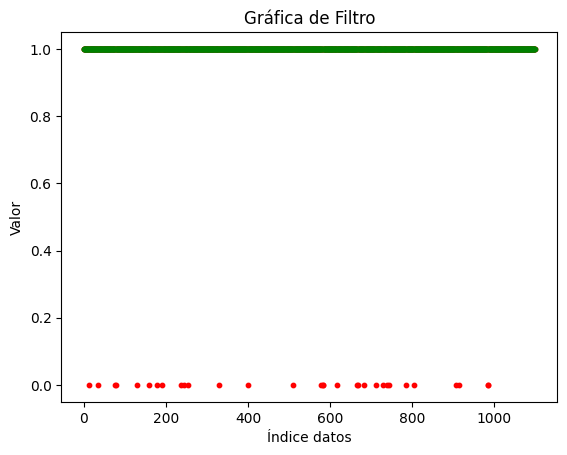

In [144]:
column_data = df['Filtro']
plt.scatter(range(len(column_data)), column_data, s=10, color='red')
plt.xlabel('Índice datos')
plt.ylabel('Valor')
plt.title('Gráfica de Filtro')
mask = column_data > 0
plt.scatter(np.where(mask)[0], column_data[mask], s=10, color='green')
plt.show()

In [145]:
df_fallas.describe()

,duracion,Promedio level pot,Nivel peak,Distorsión armónica total,Relación señal a ruido,Filtro,Falla en,Filtro2,TCREO,Filtro_Texto
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.0,31.0,31.0,31.000000,31.000000
mean,2.030710,-37.592123,-25.534770,36.578942,-3.703709,0.0,1.0,1.0,0.158254,0.516129
std,1.512504,9.076815,7.816744,4.724768,0.263951,0.0,0.0,0.0,0.062506,0.508001
min,0.408000,-53.806015,-38.159898,29.217677,-4.011207,0.0,1.0,1.0,0.000000,0.000000
25%,0.720000,-47.364042,-34.165279,32.627748,-3.915579,0.0,1.0,1.0,0.122169,0.000000
50%,1.608000,-34.882149,-23.040520,35.543299,-3.817600,0.0,1.0,1.0,0.141304,1.000000
75%,3.156000,-30.278252,-19.839516,42.240504,-3.509731,0.0,1.0,1.0,0.190598,1.000000
max,4.896000,-24.535419,-12.569038,43.753973,-3.011048,0.0,1.0,1.0,0.347179,1.000000


In [146]:
# Definir la condición
condicion = (df_fallas['Falla en'] <= 1) & (df_fallas['Relación señal a ruido'] <= -3)
# Crear la nueva columna y rellenar con unos o ceros
df_fallas['Filtro2'] = condicion.astype(int)
# Rellenar las filas donde no se cumple la condición con ceros
df_fallas.loc[condicion, 'Filtro2'] = 1
df_fallas

,RutaArchivo,Nombre archivo,duracion,Promedio level pot,Nivel peak,Distorsión armónica total,Relación señal a ruido,Filtro,Falla en,Filtro2,Transcripcion,Tipo,Transcripcion2,Texto_without_stopwords,Tokens,TCREO,Filtro_Texto
13,D:\sentirobots\Datasets\AFEW\Datos\Audios_AFEW...,000252168.wav,4.368,-28.507301,-16.714991,42.168378,-3.245836,0,1,1,AS THEY LOOKED AT IT THEY HEARD BENEATH THE PLAY,train,as they looked at it they heard beneath the play,looked heard beneath play,"['looked', 'heard', 'beneath', 'play']",0.128979,1
34,D:\sentirobots\Datasets\AFEW\Datos\Audios_AFEW...,000456960.wav,3.000,-48.896972,-35.070442,37.692030,-3.460862,0,1,1,EVEN THE REASON WHY I CAN LOSE,train,even the reason why i can lose,even reason lose,"['even', 'reason', 'lose']",0.189900,1
76,D:\sentirobots\Datasets\AFEW\Datos\Audios_AFEW...,001035680.wav,4.464,-27.157296,-17.097380,43.753973,-3.817600,0,1,1,A SHEET OF CANYON'S FERVOUR TO NE'ER A STONE,train,a sheet of canyons fervour to neer a stone,sheet canyons fervour neer stone,"['sheet', 'canyons', 'fervour', 'neer', 'stone']",0.211710,1
78,D:\sentirobots\Datasets\AFEW\Datos\Audios_AFEW...,001113440.wav,0.768,-28.277904,-15.595424,32.409875,-3.426222,0,1,1,THE RENNET,train,the rennet,rennet,['rennet'],0.150702,0
129,D:\sentirobots\Datasets\AFEW\Datos\Audios_AFEW...,001821420.wav,0.528,-31.030312,-20.400887,32.845620,-4.011207,0,1,1,ALBANY,train,albany,albany,['albany'],0.234773,0
160,D:\sentirobots\Datasets\AFEW\Datos\Audios_AFEW...,002251800.wav,4.056,-38.078235,-28.603187,43.469000,-3.615184,0,1,1,HE SAID CHILDHOOD'S OVER THE MOMENT YOU KNOW Y...,train,he said childhoods over the moment you know yo...,said childhoods moment know youre going die,"['said', 'childhoods', 'moment', 'know', 'your...",0.126704,1
179,D:\sentirobots\Datasets\AFEW\Datos\Audios_AFEW...,002516934.wav,0.744,-34.882149,-23.040520,34.093665,-3.887955,0,1,1,HYM,train,hym,hym,['hym'],0.224047,0
190,D:\sentirobots\Datasets\AFEW\Datos\Audios_AFEW...,002616120.wav,2.664,-38.348608,-27.343117,42.639820,-3.944581,0,1,1,THIS IS WHAT I IMAGINE LOVE TO BE,train,this is what i imagine love to be,imagine love,"['imagine', 'love']",0.103301,1
237,D:\sentirobots\Datasets\AFEW\Datos\Audios_AFEW...,003140160.wav,3.216,-49.695643,-35.345238,37.236692,-3.938195,0,1,1,HAD THE NUMBER FOR A TAXI ENTERED AGAINST THE ...,train,had the number for a taxi entered against the ...,number taxi entered jennie,"['number', 'taxi', 'entered', 'jennie']",0.141304,1
243,D:\sentirobots\Datasets\AFEW\Datos\Audios_AFEW...,003210880.wav,4.488,-53.806015,-34.104348,35.501692,-3.934158,0,1,1,I'M SORRY I CAN'T COME HERE JUST FORGET THIS H...,train,im sorry i cant come here just forget this hap...,im sorry cant come forget happened,"['im', 'sorry', 'cant', 'come', 'forget', 'hap...",0.137413,1


In [147]:
contars = df_fallas['Filtro2'].value_counts()
print(contars)

1    31
Name: Filtro2, dtype: int64


In [148]:
df_fallas2 = df_fallas[df_fallas['Filtro2'] == 0].copy()
df_buenas2 = df_fallas[df_fallas['Filtro2'] == 1].copy()

In [149]:
df_buenas2

,RutaArchivo,Nombre archivo,duracion,Promedio level pot,Nivel peak,Distorsión armónica total,Relación señal a ruido,Filtro,Falla en,Filtro2,Transcripcion,Tipo,Transcripcion2,Texto_without_stopwords,Tokens,TCREO,Filtro_Texto
13,D:\sentirobots\Datasets\AFEW\Datos\Audios_AFEW...,000252168.wav,4.368,-28.507301,-16.714991,42.168378,-3.245836,0,1,1,AS THEY LOOKED AT IT THEY HEARD BENEATH THE PLAY,train,as they looked at it they heard beneath the play,looked heard beneath play,"['looked', 'heard', 'beneath', 'play']",0.128979,1
34,D:\sentirobots\Datasets\AFEW\Datos\Audios_AFEW...,000456960.wav,3.000,-48.896972,-35.070442,37.692030,-3.460862,0,1,1,EVEN THE REASON WHY I CAN LOSE,train,even the reason why i can lose,even reason lose,"['even', 'reason', 'lose']",0.189900,1
76,D:\sentirobots\Datasets\AFEW\Datos\Audios_AFEW...,001035680.wav,4.464,-27.157296,-17.097380,43.753973,-3.817600,0,1,1,A SHEET OF CANYON'S FERVOUR TO NE'ER A STONE,train,a sheet of canyons fervour to neer a stone,sheet canyons fervour neer stone,"['sheet', 'canyons', 'fervour', 'neer', 'stone']",0.211710,1
78,D:\sentirobots\Datasets\AFEW\Datos\Audios_AFEW...,001113440.wav,0.768,-28.277904,-15.595424,32.409875,-3.426222,0,1,1,THE RENNET,train,the rennet,rennet,['rennet'],0.150702,0
129,D:\sentirobots\Datasets\AFEW\Datos\Audios_AFEW...,001821420.wav,0.528,-31.030312,-20.400887,32.845620,-4.011207,0,1,1,ALBANY,train,albany,albany,['albany'],0.234773,0
160,D:\sentirobots\Datasets\AFEW\Datos\Audios_AFEW...,002251800.wav,4.056,-38.078235,-28.603187,43.469000,-3.615184,0,1,1,HE SAID CHILDHOOD'S OVER THE MOMENT YOU KNOW Y...,train,he said childhoods over the moment you know yo...,said childhoods moment know youre going die,"['said', 'childhoods', 'moment', 'know', 'your...",0.126704,1
179,D:\sentirobots\Datasets\AFEW\Datos\Audios_AFEW...,002516934.wav,0.744,-34.882149,-23.040520,34.093665,-3.887955,0,1,1,HYM,train,hym,hym,['hym'],0.224047,0
190,D:\sentirobots\Datasets\AFEW\Datos\Audios_AFEW...,002616120.wav,2.664,-38.348608,-27.343117,42.639820,-3.944581,0,1,1,THIS IS WHAT I IMAGINE LOVE TO BE,train,this is what i imagine love to be,imagine love,"['imagine', 'love']",0.103301,1
237,D:\sentirobots\Datasets\AFEW\Datos\Audios_AFEW...,003140160.wav,3.216,-49.695643,-35.345238,37.236692,-3.938195,0,1,1,HAD THE NUMBER FOR A TAXI ENTERED AGAINST THE ...,train,had the number for a taxi entered against the ...,number taxi entered jennie,"['number', 'taxi', 'entered', 'jennie']",0.141304,1
243,D:\sentirobots\Datasets\AFEW\Datos\Audios_AFEW...,003210880.wav,4.488,-53.806015,-34.104348,35.501692,-3.934158,0,1,1,I'M SORRY I CAN'T COME HERE JUST FORGET THIS H...,train,im sorry i cant come here just forget this hap...,im sorry cant come forget happened,"['im', 'sorry', 'cant', 'come', 'forget', 'hap...",0.137413,1


In [150]:
# lista = df_buenas2['RutaArchivo'].tolist()

# pygame.init()
# pygame.mixer.init()

# for audio_path in lista:
#     # Cargar el archivo de audio
#     audio = AudioSegment.from_file(audio_path)

#     # Reproducir el audio
#     pygame.mixer.music.load(audio_path)
#     pygame.mixer.music.play()

#     # Mostrar el nombre del archivo que se está reproduciendo
#     print("Reproduciendo:", audio_path)

#     # Pausar la reproducción durante 5 segundos
#     #time.sleep(5)
#     #pygame.mixer.music.pause()

#     # Esperar 2 segundos
#     time.sleep(2)

#     # Reanudar la reproducción
#     pygame.mixer.music.unpause()

#     # Esperar 5 segundos antes de reproducir el siguiente archivo
#     time.sleep(1)

# # Detener la reproducción al finalizar
# pygame.mixer.music.stop()
# pygame.quit()

In [151]:
condi = (df['Falla en'] <= 1) & (df['Relación señal a ruido'] <= -3)
df['Filtro2'] = condi.astype(int)
df.loc[condi, 'Filtro2'] = 1
df

,RutaArchivo,Nombre archivo,duracion,Promedio level pot,Nivel peak,Distorsión armónica total,Relación señal a ruido,Filtro,Falla en,Filtro2,Transcripcion,Tipo,Transcripcion2,Texto_without_stopwords,Tokens,TCREO,Filtro_Texto
0,D:\sentirobots\Datasets\AFEW\Datos\Audios_AFEW...,000029301.wav,2.448,-26.925982,-13.179254,36.456134,-3.733383,1,0,1,IMMY,train,immy,immy,['immy'],0.000000,0
1,D:\sentirobots\Datasets\AFEW\Datos\Audios_AFEW...,000046280.wav,3.888,-32.735003,-18.008946,38.684294,-3.522599,1,0,1,BUT I SAY THIS TO OUR CITIZENS,train,but i say this to our citizens,say citizens,"['say', 'citizens']",0.084127,1
2,D:\sentirobots\Datasets\AFEW\Datos\Audios_AFEW...,000059880.wav,1.920,-35.309039,-21.557158,35.378896,-3.944569,1,0,1,IT IS YOU KNOW WHAT IT IS,train,it is you know what it is,know,['know'],-0.011838,0
3,D:\sentirobots\Datasets\AFEW\Datos\Audios_AFEW...,000102534.wav,2.496,-33.410550,-19.041751,36.274271,-3.878937,1,0,1,ENSLAVEMENT OF A MAN MAY,train,enslavement of a man may,enslavement man may,"['enslavement', 'man', 'may']",0.230608,1
4,D:\sentirobots\Datasets\AFEW\Datos\Audios_AFEW...,000141494.wav,3.048,-32.634227,-21.347245,40.629692,-3.941288,1,0,1,JUST ABOUT EVERYTHING I KNOW ABOUT WOMEN LOVE,train,just about everything i know about women love,everything know women love,"['everything', 'know', 'women', 'love']",0.187642,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,D:\sentirobots\Datasets\AFEW\Datos\Audios_AFEW...,015145521.wav,4.056,-35.648422,-20.992422,41.414802,-3.855075,1,0,1,HE'S GOOD WITH NUMBERS TOO AND HE WORKS FOR TH...,val,hes good with numbers too and he works for the...,hes good numbers works arras,"['hes', 'good', 'numbers', 'works', 'arras']",0.186266,1
1096,D:\sentirobots\Datasets\AFEW\Datos\Audios_AFEW...,015238600.wav,2.928,-47.447955,-25.659241,29.019201,-3.944673,1,0,1,I CAN'T SEE THE MAKE UP,val,i cant see the make up,cant see make,"['cant', 'see', 'make']",0.093120,1
1097,D:\sentirobots\Datasets\AFEW\Datos\Audios_AFEW...,015626280.wav,3.096,-38.485362,-22.614764,35.334409,-3.944595,1,0,1,BUT LEVIN HE THOUGHT YOU'RE TOO BROKE NO,val,but levin he thought youre too broke no,levin thought youre broke,"['levin', 'thought', 'youre', 'broke']",0.157466,1
1098,D:\sentirobots\Datasets\AFEW\Datos\Audios_AFEW...,015646720.wav,2.040,-37.083908,-22.043003,35.543562,-3.944599,1,0,1,I KNOW THAT YOU LOVE,val,i know that you love,know love,"['know', 'love']",0.133565,1


In [158]:
df['Filtro2'] = df['Filtro']
df

,RutaArchivo,Nombre archivo,duracion,Promedio level pot,Nivel peak,Distorsión armónica total,Relación señal a ruido,Filtro,Falla en,Filtro2,Transcripcion,Tipo,Transcripcion2,Texto_without_stopwords,Tokens,TCREO,Filtro_Texto
0,D:\sentirobots\Datasets\AFEW\Datos\Audios_AFEW...,000029301.wav,2.448,-26.925982,-13.179254,36.456134,-3.733383,1,0,1,IMMY,train,immy,immy,['immy'],0.000000,0
1,D:\sentirobots\Datasets\AFEW\Datos\Audios_AFEW...,000046280.wav,3.888,-32.735003,-18.008946,38.684294,-3.522599,1,0,1,BUT I SAY THIS TO OUR CITIZENS,train,but i say this to our citizens,say citizens,"['say', 'citizens']",0.084127,1
2,D:\sentirobots\Datasets\AFEW\Datos\Audios_AFEW...,000059880.wav,1.920,-35.309039,-21.557158,35.378896,-3.944569,1,0,1,IT IS YOU KNOW WHAT IT IS,train,it is you know what it is,know,['know'],-0.011838,0
3,D:\sentirobots\Datasets\AFEW\Datos\Audios_AFEW...,000102534.wav,2.496,-33.410550,-19.041751,36.274271,-3.878937,1,0,1,ENSLAVEMENT OF A MAN MAY,train,enslavement of a man may,enslavement man may,"['enslavement', 'man', 'may']",0.230608,1
4,D:\sentirobots\Datasets\AFEW\Datos\Audios_AFEW...,000141494.wav,3.048,-32.634227,-21.347245,40.629692,-3.941288,1,0,1,JUST ABOUT EVERYTHING I KNOW ABOUT WOMEN LOVE,train,just about everything i know about women love,everything know women love,"['everything', 'know', 'women', 'love']",0.187642,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,D:\sentirobots\Datasets\AFEW\Datos\Audios_AFEW...,015145521.wav,4.056,-35.648422,-20.992422,41.414802,-3.855075,1,0,1,HE'S GOOD WITH NUMBERS TOO AND HE WORKS FOR TH...,val,hes good with numbers too and he works for the...,hes good numbers works arras,"['hes', 'good', 'numbers', 'works', 'arras']",0.186266,1
1096,D:\sentirobots\Datasets\AFEW\Datos\Audios_AFEW...,015238600.wav,2.928,-47.447955,-25.659241,29.019201,-3.944673,1,0,1,I CAN'T SEE THE MAKE UP,val,i cant see the make up,cant see make,"['cant', 'see', 'make']",0.093120,1
1097,D:\sentirobots\Datasets\AFEW\Datos\Audios_AFEW...,015626280.wav,3.096,-38.485362,-22.614764,35.334409,-3.944595,1,0,1,BUT LEVIN HE THOUGHT YOU'RE TOO BROKE NO,val,but levin he thought youre too broke no,levin thought youre broke,"['levin', 'thought', 'youre', 'broke']",0.157466,1
1098,D:\sentirobots\Datasets\AFEW\Datos\Audios_AFEW...,015646720.wav,2.040,-37.083908,-22.043003,35.543562,-3.944599,1,0,1,I KNOW THAT YOU LOVE,val,i know that you love,know love,"['know', 'love']",0.133565,1


In [159]:
df.describe()

,duracion,Promedio level pot,Nivel peak,Distorsión armónica total,Relación señal a ruido,Filtro,Falla en,Filtro2,TCREO,Filtro_Texto
count,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1096.000000,1100.000000
mean,2.485680,-37.721084,-22.911291,35.615331,-3.850305,0.971818,0.028182,0.971818,0.143158,0.963636
std,1.018076,5.040736,4.374026,3.044942,0.176247,0.165567,0.165567,0.165567,0.054984,0.187278
min,0.408000,-53.806015,-38.159898,24.005381,-4.064787,0.000000,0.000000,0.000000,-0.123927,0.000000
25%,1.680000,-40.963205,-25.403686,33.766687,-3.943259,1.000000,0.000000,1.000000,0.111438,1.000000
50%,2.280000,-37.463662,-22.465616,35.844645,-3.931935,1.000000,0.000000,1.000000,0.138747,1.000000
75%,3.120000,-34.348698,-20.126293,37.743669,-3.848142,1.000000,0.000000,1.000000,0.171782,1.000000
max,6.216000,-20.837989,-8.837564,43.753973,-3.011048,1.000000,1.000000,1.000000,0.381612,1.000000


In [160]:
ruta_primer_registro = df['RutaArchivo'].iloc[0]
print(ruta_primer_registro)

D:\sentirobots\Datasets\AFEW\Datos\Audios_AFEW\Train\000029301.wav


In [161]:
contars2 = df['Filtro2'].value_counts()
print(contars2)

1    1069
0      31
Name: Filtro2, dtype: int64


In [163]:
df.to_csv(r'D:\sentirobots\Calidad de audio y texto transcrito\TCREO\Calidad-Audio-Transcripcion-TCREO-AFEW-new.csv', index=False)
print("Realizado")

Realizado
